# Stock Price Prediction

In [1]:
#Import Dependencies

# import sys
# !{sys.executable} -m pip install mpl_finance

%run ./'Basic_Import.ipynb'
## Which imports the following libraries and functions:
# import pandas as pd, numpy as np, matplotlib.pyplot as plt
# from jupyterthemes import jtplot
# jtplot.style()
# from sklearn.model_selection import train_test_split as tts
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import confusion_matrix
# pd.set_option('display.max_columns', None)
# %matplotlib inline
import pandas_datareader as pdr, datetime
import pandas_datareader.data as web

In [2]:
#Establish Date Range for the tickers

start = datetime.datetime(2019,1,1)
end = datetime.datetime(2020,4,3)

In [3]:
#Call the data of the desired tickers utilizing Data Reader

jpm = web.DataReader('JPM','yahoo',start,end)
#jpm.head()
abbv = web.DataReader('ABBV', 'yahoo',start,end)
#abbv.head()
sftby = web.DataReader('SFTBY', 'yahoo',start,end)
#sftby.head()

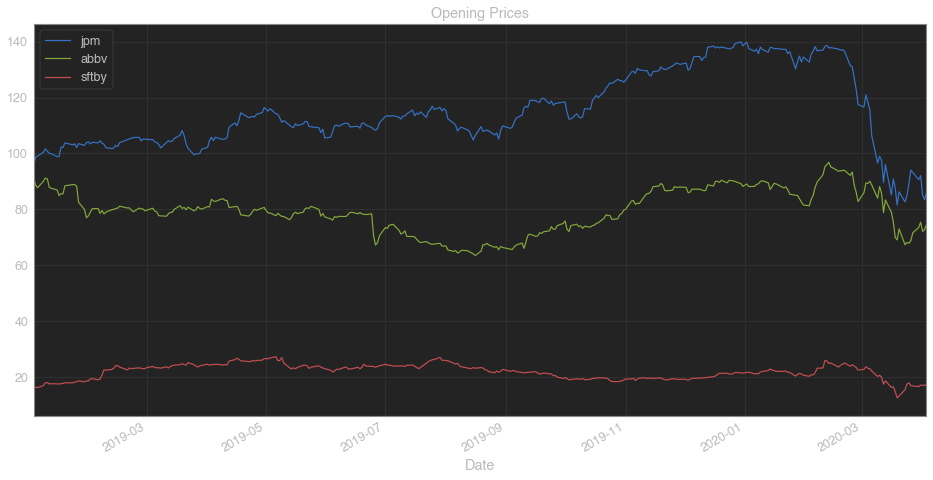

In [4]:
#Graph the data of the tickers

jpm['Open'].plot(label='jpm',figsize=(16,8),title='Opening Prices')
abbv['Open'].plot(label='abbv')
sftby['Open'].plot(label='sftby')
plt.legend();

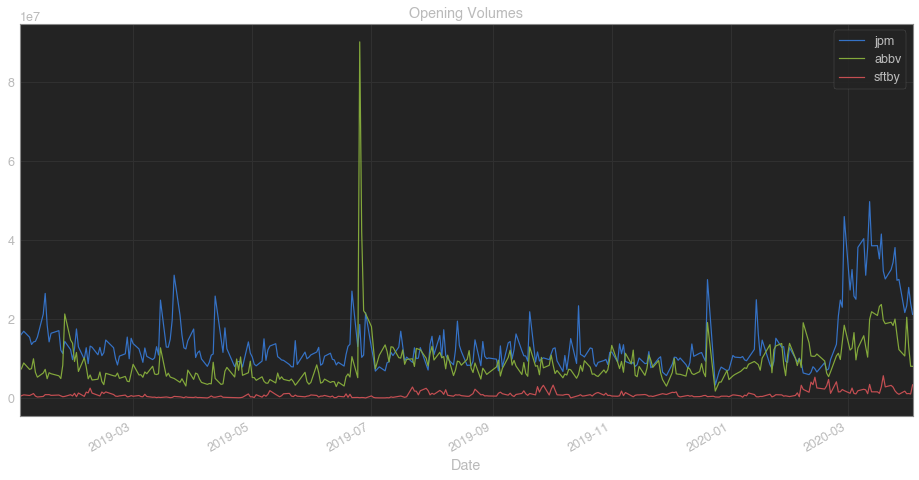

In [5]:
#Plot the Volume

jpm['Volume'].plot(label='jpm',figsize=(16,8),title='Opening Volumes')
abbv['Volume'].plot(label='abbv')
sftby['Volume'].plot(label='sftby')
plt.legend();

In [6]:
#Find Peak Volume for abbv
abbv['Volume'].argmax()

/Users/morgan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  


Timestamp('2019-06-25 00:00:00')

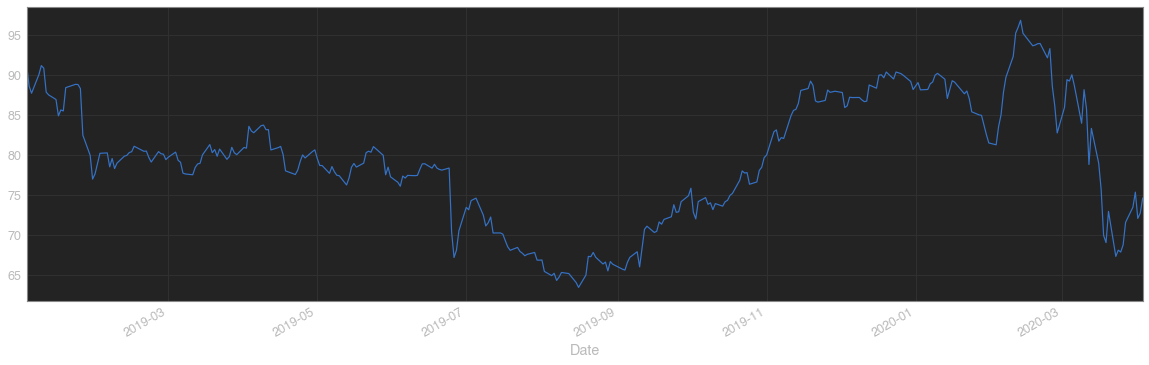

In [7]:
#Plot to determine price fluctuation at peak volume
abbv['Open'].plot(figsize=(20,6));

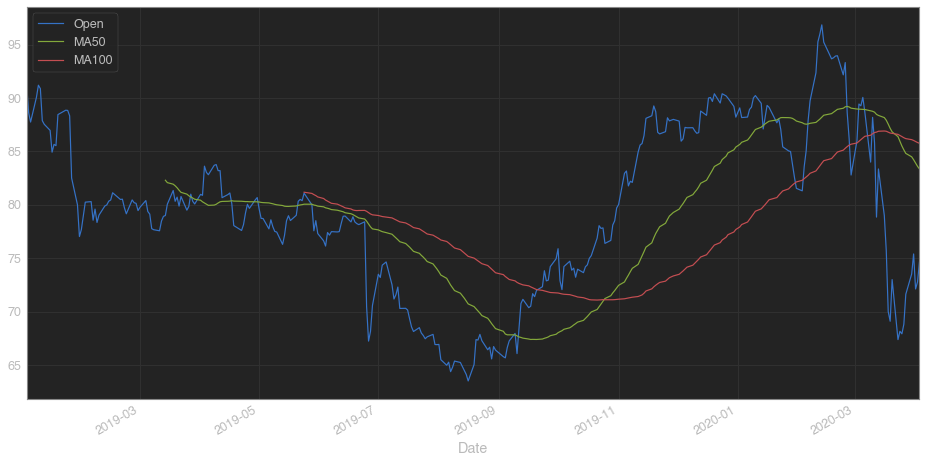

In [8]:
#Plot the moving average of the desired ticker

abbv['MA50']=abbv['Open'].rolling(50).mean()
abbv['MA100']=abbv['Open'].rolling(100).mean()
abbv[['Open','MA50','MA100']].plot(figsize=(16,8));

In [9]:
# Concatenate the Opening Prices of the 3 tickers

car_comp = pd.concat([jpm['Open'],abbv['Open'],sftby['Open']], axis=1)
car_comp.columns=['jpm Open','abbv Open','sftby Open']
car_comp.head()

,jpm Open,abbv Open,sftby Open
Date,,,
2019-01-02,95.949997,91.239998,16.129999
2019-01-03,98.639999,88.639999,16.445000
2019-01-04,99.110001,87.750000,16.280001
2019-01-07,100.430000,90.070000,17.000000
2019-01-08,101.629997,91.199997,18.035000


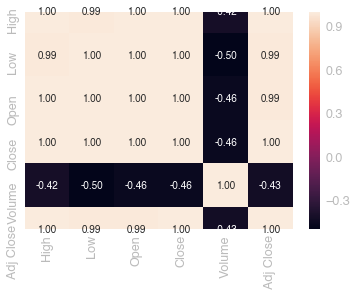

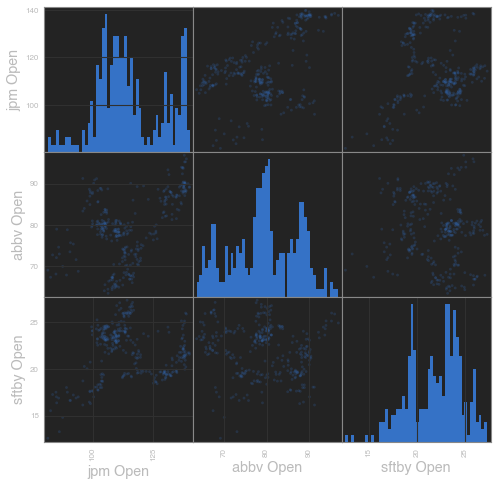

In [10]:
#Create Scatter Plots to visualize correlations
from pandas.plotting import scatter_matrix
import seaborn as sns
sns.heatmap(jpm.corr(),annot=True, fmt='0.2f');
scatter_matrix(car_comp, figsize=(8,8), alpha=0.2,hist_kwds={'bins':50});

/Users/morgan/opt/anaconda3/lib/python3.7/site-packages/mpl_finance.py:22: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  category=DeprecationWarning)


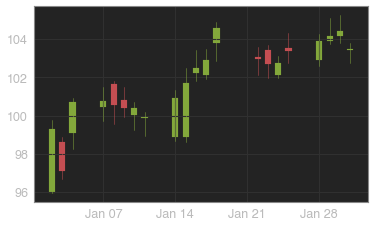

In [11]:
#Create candlestick chart

#Import Dependencies
from mpl_finance import candlestick_ohlc
from matplotlib.dates import DateFormatter,date2num,WeekdayLocator,DayLocator,MONDAY

#Reset the index and define time period of desired data
jpm_reset=jpm.loc['2019-01'].reset_index()
#jpm_reset.info()

#Create Date Axis
jpm_reset['date_ax']=jpm_reset['Date'].apply(lambda date: date2num(date))
#jpm_reset.head()

#Create list of values to plot
list_of_cols=['date_ax','Open','High','Low','Close']
jpm_values = [tuple(vals) for vals in jpm_reset[list_of_cols].values]
#jpm_values

#Define variables for desired dates
mondays=WeekdayLocator(MONDAY) #Major ticks on Mondays
alldays=DayLocator() # Minor Ticks on the days
weekFormatter=DateFormatter('%b %d') #Month and Day
dayFormatter=DateFormatter('%d') #Day

#Create the actual candlestick plot
fig, ax=plt.subplots()
fig.subplots_adjust(bottom=0.2)
ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_minor_locator(alldays)
ax.xaxis.set_major_formatter(weekFormatter)
candlestick_ohlc(ax,jpm_values,width=0.6,colorup='g',colordown='r');

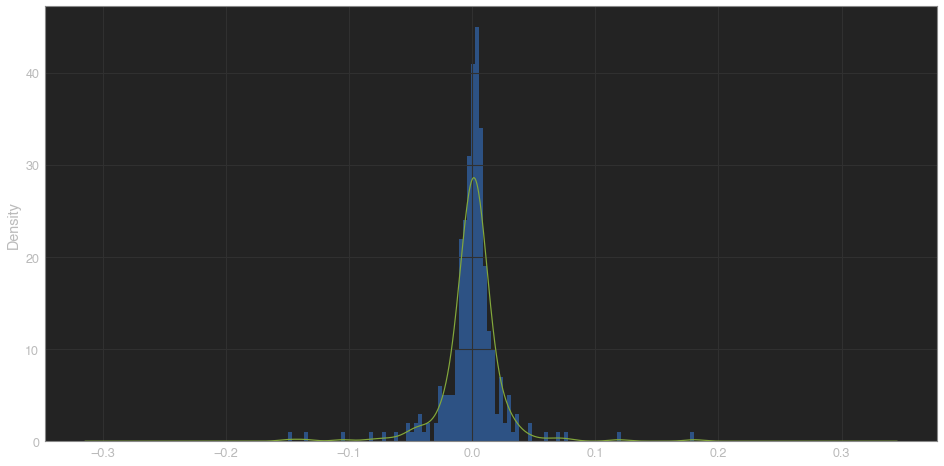

In [12]:
#Calculate Percent Return over specified date

# One or the other (both formulas return the same result)
# jpm['returns'] = (jpm['Close']/jpm['Close'].shift(1)) - 1
jpm['returns'] = jpm['Close'].pct_change(1)

# Create Histogram of Price Changes
jpm['returns'].hist(bins=100,label='jpm',figsize=(16,8),alpha=0.6);

# Create a KDE to verify stability of the ticker
jpm['returns'].plot(kind='kde',label='jpm',figsize=(16,8))

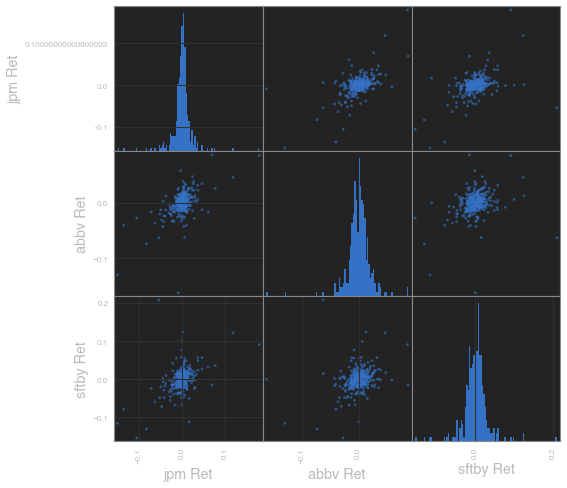

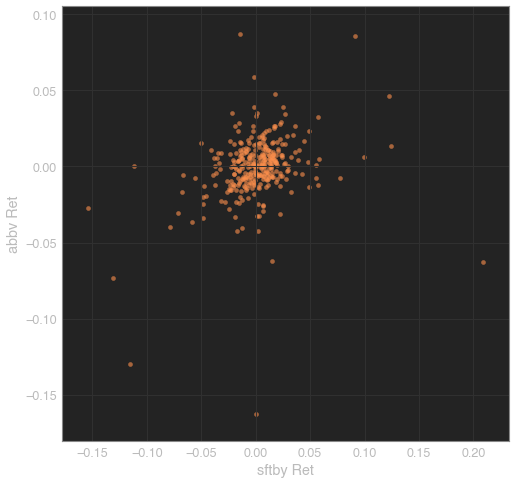

In [13]:
# Create a scatter plot of at least 2 tickers to identify a correlation

jpm['returns'] = jpm['Close'].pct_change(1)
abbv['returns'] = abbv['Close'].pct_change(1)
sftby['returns'] = sftby['Close'].pct_change(1)
ret_comp = pd.concat([jpm['returns'],abbv['returns'], sftby['returns']],axis=1)
ret_comp.columns=['jpm Ret','abbv Ret', 'sftby Ret']
scatter_matrix(ret_comp, figsize=(8,8), alpha=0.6, hist_kwds={'bins':100});
#Limited to 2 dimensions
ret_comp.plot(kind='scatter',x='sftby Ret',y='abbv Ret',alpha=0.6,figsize=(8,8), color='y');

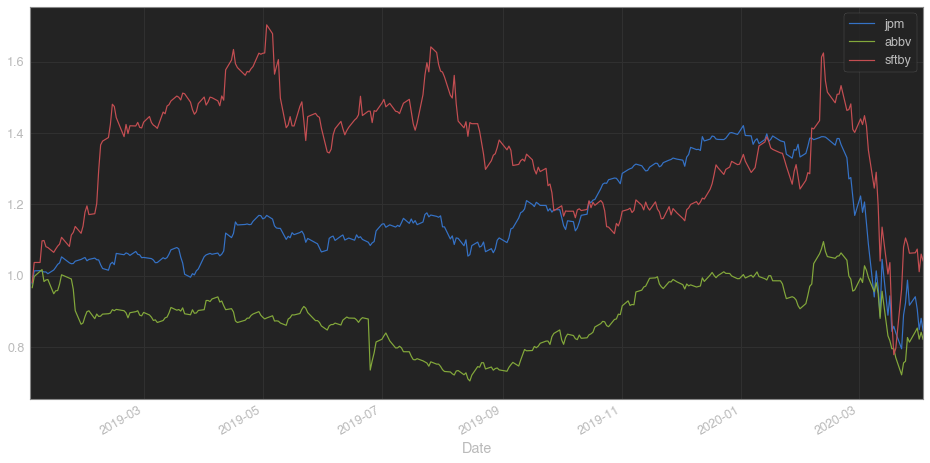

In [14]:
# Cumulative Returns
jpm['Cumulative Return'] = (1+jpm['returns']).cumprod()
abbv['Cumulative Return'] = (1+abbv['returns']).cumprod()
sftby['Cumulative Return'] = (1+sftby['returns']).cumprod()
jpm['Cumulative Return'].plot(label='jpm',figsize=(16,8))
abbv['Cumulative Return'].plot(label='abbv')
sftby['Cumulative Return'].plot(label='sftby')
plt.legend();

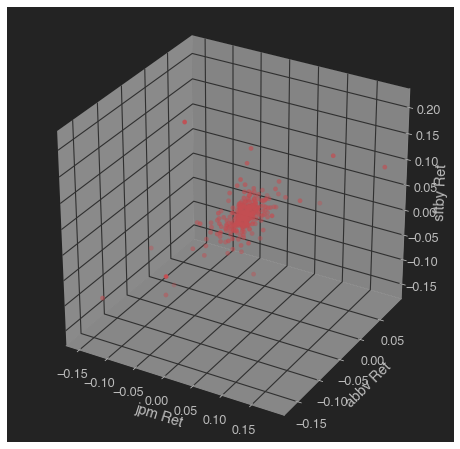

In [15]:
# Create 3D plots of returns

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

x = jpm['returns']
y = abbv['returns']
z = sftby['returns']

ax.scatter(x, y, z, c='r', marker='o')
ax.set_xlabel('jpm Ret')
ax.set_ylabel('abbv Ret')
ax.set_zlabel('sftby Ret')
plt.show()

## Monte Carlo Simulation of $JPM

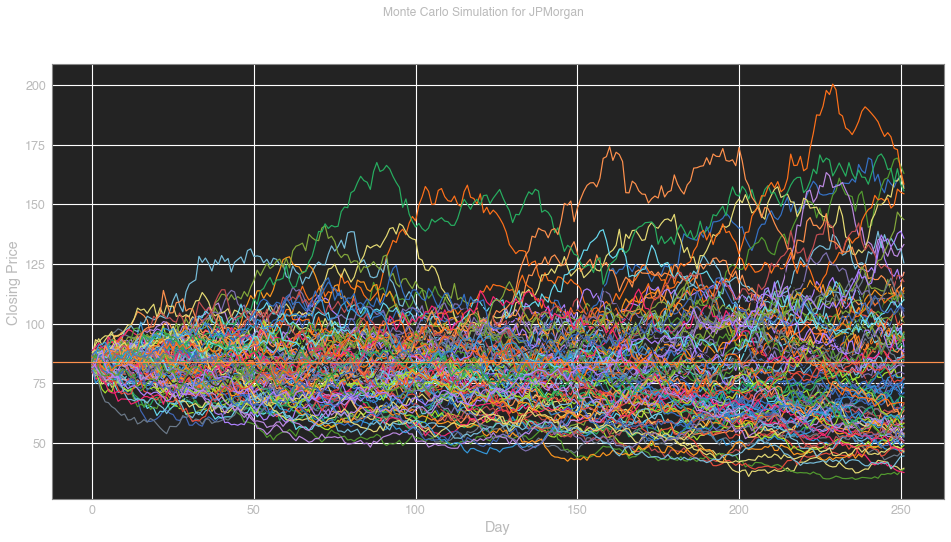

In [16]:
jpm = web.DataReader('JPM','yahoo',start,end)
JPM = jpm['Close']
returns = JPM.pct_change()
closing_price = JPM[-1]

# Initiate variables
number_of_simulations = 100
days_observed = 252

# construct simulation
simulation_df = pd.DataFrame()
for x in range(number_of_simulations):
    count = 0
    daily_volume = returns.std()
    price_series = []
    price = closing_price * (1+np.random.normal(0, daily_volume))
    price_series.append(price)   
    for y in range(days_observed):
        if count == 251:
            break
        price = price_series[count] * (1+np.random.normal(0, daily_volume))
        price_series.append(price)
        count += 1
    simulation_df[x] = price_series
fig = plt.figure(figsize=(16,8))
fig.suptitle('Monte Carlo Simulation for JPMorgan')
plt.plot(simulation_df)
plt.axhline(y = closing_price, color = 'y', linestyle = '-')
plt.xlabel('Day')
plt.ylabel('Closing Price')
plt.grid(axis = 'both', color = 'white')
plt.show()

In [17]:
print('#------------------Simulation Stats------------------#')
count = 1
for column in simulation_df:
    print("Simulation", count, "Mean Price: ", simulation_df[column].mean())
    print("Simulation", count, "Median Price: ", simulation_df[column].median())
    count += 1

print('\n')

print('#----------------------Last Price Stats--------------------#')
print("Mean Price: ", np.mean(simulation_df.iloc[-1,:]))
print("Maximum Price: ",np.max(simulation_df.iloc[-1,:]))
print("Minimum Price: ", np.min(simulation_df.iloc[-1,:]))
print("Standard Deviation: ",np.std(simulation_df.iloc[-1,:]))

print('\n')

print('#----------------------Descriptive Stats-------------------#')
price_array = simulation_df.iloc[-1, :]
print(price_array.describe())

print('\n')

print('#--------------Annual Expected Returns for Trials-----------#')
count = 1
future_returns = simulation_df.pct_change()
for column in future_returns:
    print("Simulation", count, "Annual Expected Return", "{0:.2f}%".format((future_returns[column].mean() * 252) * 100))
    print("Simulation", count, "Total Return", "{0:.2f}%".format((future_returns[column].iloc[1] / future_returns[column].iloc[-1] - 1) * 100))
    count += 1     

print('\n')

#Create Column For Average Daily Price Across All Trials
simulation_df['Average'] = simulation_df.mean(axis=1)
ser = simulation_df['Average']

print('#----------------------Percentiles--------------------------------#')
percentile_list = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95]
for per in percentile_list:
    print("{}th Percentile: ".format(per), np.percentile(price_array, per))

#------------------Simulation Stats------------------#
Simulation 1 Mean Price:  103.12427160018885
Simulation 1 Median Price:  87.99063477941765
Simulation 2 Mean Price:  77.30009531923223
Simulation 2 Median Price:  75.8251132087483
Simulation 3 Mean Price:  78.51830449280152
Simulation 3 Median Price:  79.1454624960895
Simulation 4 Mean Price:  83.94394397046409
Simulation 4 Median Price:  85.40799471433283
Simulation 5 Mean Price:  95.22036543946881
Simulation 5 Median Price:  96.4469680384968
Simulation 6 Mean Price:  92.79386996798533
Simulation 6 Median Price:  87.38510478095199
Simulation 7 Mean Price:  63.11554813883355
Simulation 7 Median Price:  61.80826995555999
Simulation 8 Mean Price:  76.82898702780311
Simulation 8 Median Price:  77.03361417189086
Simulation 9 Mean Price:  64.4430381314142
Simulation 9 Median Price:  63.20176510136548
Simulation 10 Mean Price:  79.41532563449654
Simulation 10 Median Price:  76.55016328789812
Simulation 11 Mean Price:  87.37439468304049
S

Simulation 100 Annual Expected Return 58.65%
Simulation 100 Total Return -174.98%


#----------------------Percentiles--------------------------------#
5th Percentile:  46.3590472138942
10th Percentile:  49.83513945622822
15th Percentile:  53.085060886132545
20th Percentile:  56.16620242292885
25th Percentile:  58.48114516540832
30th Percentile:  62.96001657898505
35th Percentile:  65.999711321328
40th Percentile:  71.06122924142004
45th Percentile:  76.84583047701584
50th Percentile:  80.6984092903504
55th Percentile:  85.99788267388627
60th Percentile:  89.74120087079501
65th Percentile:  93.23224853374165
70th Percentile:  94.98213355256539
75th Percentile:  100.36483071751704
80th Percentile:  107.08835260749208
85th Percentile:  114.01641955854271
90th Percentile:  121.94180315256888
95th Percentile:  154.47103313381325
